# Data Analysis Project on Online Retail Sales Dataset

This notebook performs an exploratory data analysis (EDA) on the [Online Retail UK dataset](https://www.kaggle.com/datasets/jazidesigns/online-retail-uk), which contains transactional data from a UK-based online store.

It:
- Understand sales performance across time, regions and products
- Identify customer purchasing behaviors
- Segment customers for targeted marketing using RFM analysis
- Detect churned customers and recommend retention strategies

In [1]:
# Installing necessary packages
!pip install openpyxl

#importing libraries
import pandas as pd
import matplotlib.pyplot as plt

## 1. Load the Dataset
We'll download the dataset using `kagglehub` and load it into a Pandas DataFrame.

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("jazidesigns/online-retail-uk")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/online-retail-uk


In [3]:
# Specify file path and read the Excel file
file_path = path + '/Online Retail.xlsx'
data = pd.read_excel(file_path)

## 2. Understand the Data

In [4]:
data.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
data.dtypes

,0
InvoiceNo,object
StockCode,object
Description,object
Quantity,int64
InvoiceDate,datetime64[ns]
UnitPrice,float64
CustomerID,float64
Country,object


In [6]:
data.shape

(541909, 8)

In [7]:
# Dataset overview
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [8]:
data.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


In [9]:
#Checking for null values
data.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


In [10]:
data.dtypes

,0
InvoiceNo,object
StockCode,object
Description,object
Quantity,int64
InvoiceDate,datetime64[ns]
UnitPrice,float64
CustomerID,float64
Country,object


## 3. Data Cleaning

Now that we understand the structure and contents of the dataset, we'll move on to cleaning the data.

In [11]:
# Cast relevant columns to string
data = data.astype({
    'InvoiceNo': 'string',
    'StockCode': 'string',
    'Description': 'string',
    'Country': 'string'
})

In [12]:
data.dtypes

,0
InvoiceNo,string[python]
StockCode,string[python]
Description,string[python]
Quantity,int64
InvoiceDate,datetime64[ns]
UnitPrice,float64
CustomerID,float64
Country,string[python]


In [13]:
data.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


In [14]:
# Display rows where the 'Description' column is missing
data[data['Description'].isnull()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,<NA>,56,2010-12-01 11:52:00,0.0,NaN,United Kingdom
1970,536545,21134,<NA>,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom
1971,536546,22145,<NA>,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1972,536547,37509,<NA>,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1987,536549,85226A,<NA>,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
535322,581199,84581,<NA>,-2,2011-12-07 18:26:00,0.0,NaN,United Kingdom
535326,581203,23406,<NA>,15,2011-12-07 18:31:00,0.0,NaN,United Kingdom
535332,581209,21620,<NA>,6,2011-12-07 18:35:00,0.0,NaN,United Kingdom
536981,581234,72817,<NA>,27,2011-12-08 10:33:00,0.0,NaN,United Kingdom


In [15]:
data[data['StockCode']== '22139']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
106,536381,22139,RETROSPOT TEA SET CERAMIC 11 PC,23,2010-12-01 09:41:00,4.25,15311.0,United Kingdom
622,536414,22139,<NA>,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom
6392,536942,22139,amazon,15,2010-12-03 12:08:00,0.00,NaN,United Kingdom
6885,536982,22139,RETROSPOT TEA SET CERAMIC 11 PC,10,2010-12-03 14:27:00,11.02,NaN,United Kingdom
7203,537011,22139,<NA>,-5,2010-12-03 15:38:00,0.00,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
538411,581405,22139,RETROSPOT TEA SET CERAMIC 11 PC,1,2011-12-08 13:50:00,4.95,13521.0,United Kingdom
539531,581439,22139,RETROSPOT TEA SET CERAMIC 11 PC,1,2011-12-08 16:30:00,10.79,NaN,United Kingdom
540441,581486,22139,RETROSPOT TEA SET CERAMIC 11 PC,6,2011-12-09 09:38:00,4.95,17001.0,United Kingdom
541387,581498,22139,RETROSPOT TEA SET CERAMIC 11 PC,2,2011-12-09 10:26:00,10.79,NaN,United Kingdom


In [16]:
# Get the total count and the number of unique StockCodes
data.StockCode.agg(count='count', unique='nunique')

,StockCode
count,541909
unique,4070


In [17]:
# Get the most common description for StockCode '22139'
data[data['StockCode'] == '22139']['Description'].mode()

,Description
0,RETROSPOT TEA SET CERAMIC 11 PC


In [18]:
# Count how often each unique combination of StockCode and Description appears
most_freq = data[['StockCode','Description']].value_counts().reset_index()
most_freq

,StockCode,Description,count
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2302
1,22423,REGENCY CAKESTAND 3 TIER,2200
2,85099B,JUMBO BAG RED RETROSPOT,2159
3,47566,PARTY BUNTING,1727
4,20725,LUNCH BAG RED RETROSPOT,1638
...,...,...,...
4787,21491,SET OF THREE VINTAGE GIFT WRAPS,1
4788,84876D,damaged,1
4789,20827,damages,1
4790,20832,check,1


In [19]:
most_freq[most_freq['StockCode'] == '22139']

,StockCode,Description,count
37,22139,RETROSPOT TEA SET CERAMIC 11 PC,988
4781,22139,amazon,1


In [20]:
# Rename columns for clarity
most_freq.columns = ['StockCode','Freq_Description','Count']

# Keep only the most frequent description per StockCode
most_freq = most_freq.groupby('StockCode').head(1)

most_freq

,StockCode,Freq_Description,Count
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2302
1,22423,REGENCY CAKESTAND 3 TIER,2200
2,85099B,JUMBO BAG RED RETROSPOT,2159
3,47566,PARTY BUNTING,1727
4,20725,LUNCH BAG RED RETROSPOT,1638
...,...,...,...
4755,37503,TEA TIME CAKE STAND IN GIFT BOX,1
4773,37461,FUNKY MONKEY MUG,1
4775,37474,SET/4 2 TONE EGG SHAPE MIXING BOWLS,1
4782,22145,CHRISTMAS CRAFT HEART STOCKING,1


In [21]:
# Merge the most frequent description per StockCode into the main dataset
df1 = pd.merge(data, most_freq, on='StockCode', how='left')

In [22]:
# Replace missing values in 'Description' with the most frequent description for that StockCode
df1['Description'] = df1['Description'].mask(df1['Description'].isnull(), df1['Freq_Description'])
df1

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Freq_Description,Count
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,2302.0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,WHITE METAL LANTERN,328.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,CREAM CUPID HEARTS COAT HANGER,293.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,KNITTED UNION FLAG HOT WATER BOTTLE,473.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,RED WOOLLY HOTTIE WHITE HEART.,449.0
...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,PACK OF 20 SPACEBOY NAPKINS,148.0
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,CHILDREN'S APRON DOLLY GIRL,320.0
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,CHILDRENS CUTLERY DOLLY GIRL,307.0
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,CHILDRENS CUTLERY CIRCUS PARADE,162.0


In [23]:
df1.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,112
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0
Freq_Description,112
Count,112


In [24]:
# Drop the helper columns used during imputation
df1.drop(['Freq_Description','Count'], axis=1, inplace=True)

In [25]:
# Drop rows where 'Description' is still missing
df1.dropna(subset = ['Description'], inplace=True)
df1.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,134968
Country,0


In [26]:
df1.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541797.000000,541797,541797.000000,406829.000000
mean,9.555919,2011-07-04 14:06:48.671255296,4.612067,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:36:00,1.250000,13953.000000
50%,3.000000,2011-07-20 08:59:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:41:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.103428,NaN,96.769831,1713.600303


In [27]:
# Count the number of rows with non-positive quantity values (<= 0)
df1[df1['Quantity']<=0].shape[0]

10527

In [28]:
# Count the number of rows with zero or negative unit prices
df1[df1['UnitPrice']<=0].shape[0]

2405

In [29]:
# Filter the dataset to include only transactions with positive quantity and unit price
df2 = df1[(df1['Quantity']>0) & (df1['UnitPrice']>0)]
df2.shape

(530104, 8)

In [30]:
df2.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,530104.000000,530104,530104.000000,397884.000000
mean,10.542037,2011-07-04 20:16:05.225087744,3.907625,15294.423453
min,1.000000,2010-12-01 08:26:00,0.001000,12346.000000
25%,1.000000,2011-03-28 12:22:00,1.250000,13969.000000
50%,3.000000,2011-07-20 12:58:00,2.080000,15159.000000
75%,10.000000,2011-10-19 12:39:00,4.130000,16795.000000
max,80995.000000,2011-12-09 12:50:00,13541.330000,18287.000000
std,155.524124,NaN,35.915681,1713.141560


In [31]:
# Calculate upper quantiles of the Quantity column to detect outliers
df2['Quantity'].quantile([0.75,0.9,0.95,0.9999])

,Quantity
0.7500,10.0000
0.9000,24.0000
0.9500,30.0000
0.9999,1439.8764


In [32]:
# Calculate upper quantiles of the UnitPrice column to detect outliers
df2['UnitPrice'].quantile([0.75,0.9,0.95,0.9999])

,UnitPrice
0.7500,4.130000
0.9000,7.950000
0.9500,9.950000
0.9999,1008.744112


Business Insight:

After discussing with the Business Manager, we decided to **retain transactions with high quantities and unit prices**. These cases, while rare, are considered genuine — such as **bulk purchases** by retailers or **high-value premium products**. Removing them could lead to a loss of important insights.


## 4. Feature Engineering

Now that the dataset is cleaned, we create new features that will help with deeper analysis. One of the most important metrics in retail is **Total Revenue**, calculated by multiplying `Quantity` and `UnitPrice`.

In [33]:
# Create a copy of the cleaned data to preserve df2
df3 = df2.copy()

df3['TotalRevenue'] = df3['Quantity'] * df3['UnitPrice']
df3.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalRevenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [34]:
# Extract the year from the InvoiceDate
df3['Year'] = df3['InvoiceDate'].dt.year

# Extract the month from the InvoiceDate
df3['Month'] = df3['InvoiceDate'].dt.month

In [35]:
df3.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalRevenue,Year,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010,12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010,12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12


In [36]:
# Check which years are available in the dataset
df3['Year'].unique()

array([2010, 2011], dtype=int32)

In [37]:
# Calculate total revenue per year
df3.groupby('Year')['TotalRevenue'].sum()

,TotalRevenue
Year,
2010,823746.140
2011,9842938.404


In [38]:
# Check which months are present for the year 2010
df3[df3['Year'] == 2010]['Month'].unique()

array([12], dtype=int32)

Since the dataset does not contain complete data for 2010, we focus our time-based analysis on the year **2011**, which has full month coverage. Below, we calculate the total revenue for each month of 2011.

In [39]:
#Monthly Sales for 2011
sales_2011 = df3[df3['Year'] == 2011].groupby('Month')['TotalRevenue'].sum()

## 5. Exploratory Data Analysis (EDA)

Now that the dataset is cleaned and key features are engineered, we dive into Exploratory Data Analysis (EDA). This step helps uncover patterns, trends, and insights that inform business decisions and future modeling.


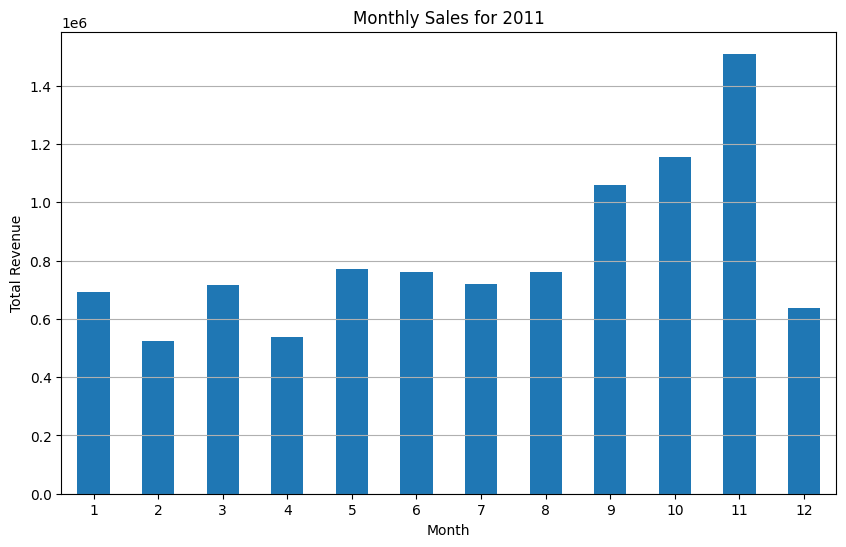

In [40]:
# Plot monthly sales for 2011
sales_2011.plot(kind='bar', figsize=(10, 6))
plt.title('Monthly Sales for 2011')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

In [41]:
# Group by country and calculate total revenue, sorted from highest to lowest
country_wise_sales = df3.groupby('Country')['TotalRevenue'].sum().sort_values(ascending=False).reset_index()

In [42]:
# Filter countries with total revenue greater than 100,000 and sort in descending order
sales_above_100000 = country_wise_sales[country_wise_sales['TotalRevenue'] > 100000].sort_values(by='TotalRevenue', ascending=False)

In [43]:
sales_above_100000

,Country,TotalRevenue
0,United Kingdom,9025222.084
1,Netherlands,285446.340
2,EIRE,283453.960
3,Germany,228867.140
4,France,209715.110
5,Australia,138521.310


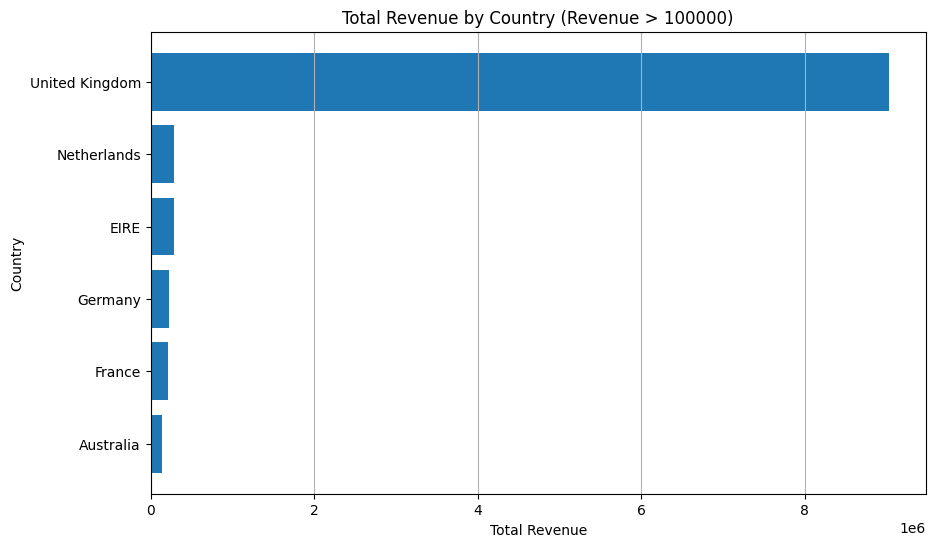

In [44]:
# Create a horizontal bar chart to visualize countries with revenue above 100,000
plt.figure(figsize=(10, 6))
plt.barh(sales_above_100000['Country'], sales_above_100000['TotalRevenue'])
plt.xlabel('Total Revenue')
plt.ylabel('Country')
plt.title('Total Revenue by Country (Revenue > 100000)')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest revenue at the top
plt.grid(axis='x')
plt.show()

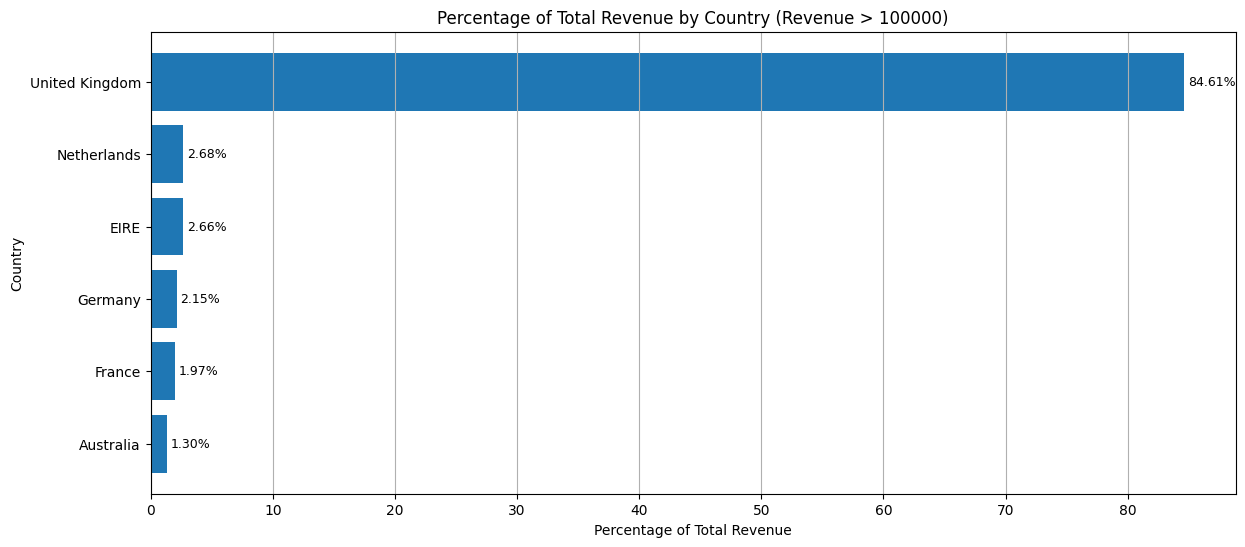

In [45]:
# Calculate total revenue across all countries
total_sales = country_wise_sales['TotalRevenue'].sum()

# Calculate the percentage of total revenue for each high-performing country
percentage_sales = (sales_above_100000['TotalRevenue'] / total_sales) * 100

# Plot percentage contribution using a horizontal bar chart
plt.figure(figsize=(14, 6))
plt.barh(sales_above_100000['Country'], percentage_sales)
plt.xlabel('Percentage of Total Revenue')
plt.ylabel('Country')
plt.title('Percentage of Total Revenue by Country (Revenue > 100000)')

#show label of percentage
for i, v in enumerate(percentage_sales):
    plt.text(v+0.3, i, f'{v:.2f}%', color='black', va='center',fontsize = 9)

plt.gca().invert_yaxis()  # Invert y-axis to have the highest percentage at the top
plt.grid(axis='x')
plt.show()

In [46]:
# Group by product (StockCode) and calculate total revenue, sorted descending
product_wise_sales = df3.groupby('StockCode')['TotalRevenue'].sum().sort_values(ascending=False).reset_index()

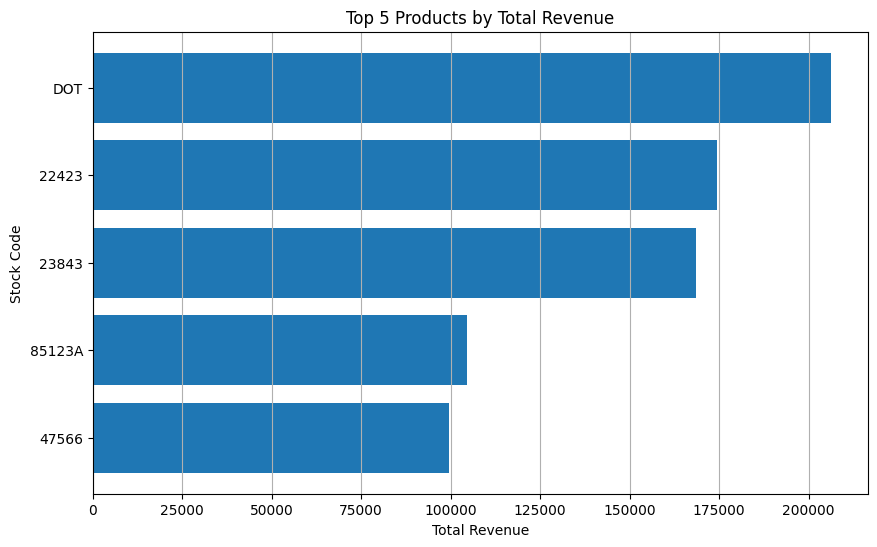

In [47]:
# Get top 5 products by total revenue
top_5_product = product_wise_sales.head(5)

# Plot a horizontal bar chart for top 5 products
plt.figure(figsize=(10, 6))
plt.barh(top_5_product['StockCode'], top_5_product['TotalRevenue'])
plt.xlabel('Total Revenue')
plt.ylabel('Stock Code')
plt.gca().invert_yaxis()
plt.title('Top 5 Products by Total Revenue')
plt.grid(axis='x')
plt.show()

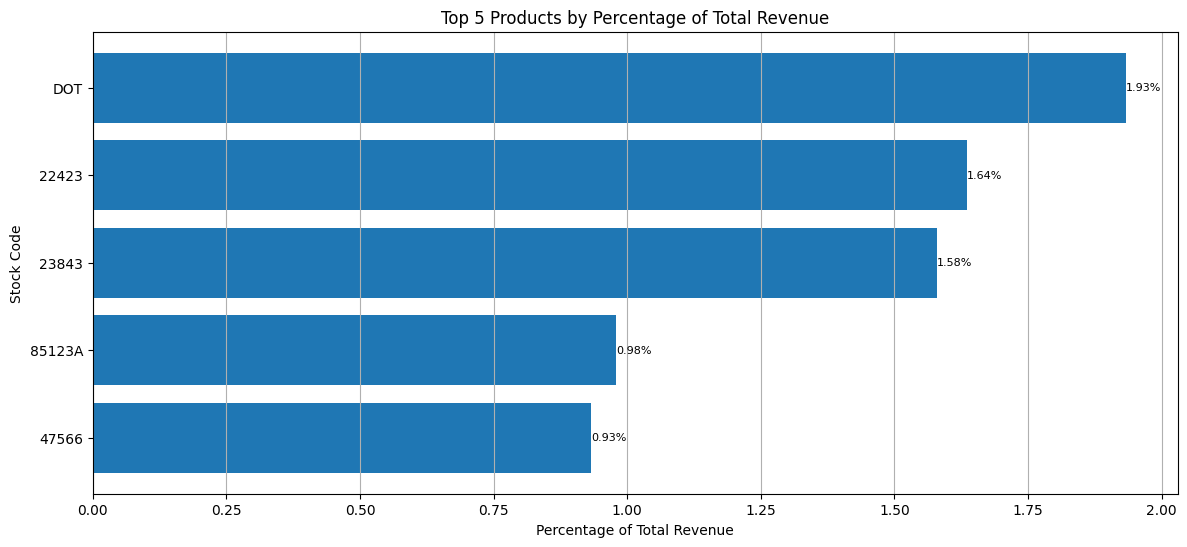

In [48]:
# Calculate total revenue across all products
total_product_sales = product_wise_sales['TotalRevenue'].sum()

# Calculate the percentage of total revenue for top 5 products
percentage_product_sales = (top_5_product['TotalRevenue'] / total_product_sales) * 100

# Plot the percentage contribution of top 5 products
plt.figure(figsize=(14, 6))
plt.barh(top_5_product['StockCode'], percentage_product_sales)
plt.xlabel('Percentage of Total Revenue')
plt.ylabel('Stock Code')
plt.gca().invert_yaxis()
plt.title('Top 5 Products by Percentage of Total Revenue')

# Add percentage labels to the bars
for i, v in enumerate(percentage_product_sales):
    plt.text(v, i, f'{v:.2f}%', color='black', va='center',fontsize = 8)

plt.grid(axis='x')
plt.show()

## 6. RFM Analysis (Recency, Frequency, Monetary)

To understand customer purchasing behavior, we perform RFM analysis:

- **Recency**: How recently a customer made a purchase
- **Frequency**: How often a customer makes purchases
- **Monetary**: How much money a customer spends

We start by defining a reference point (`current_date`) for calculating recency. This is set to one day after the last invoice in the dataset.

In [49]:
df3['InvoiceDate'].max()

Timestamp('2011-12-09 12:50:00')

In [50]:
current_date = df3['InvoiceDate'].max() + pd.Timedelta(days=1)
current_date

Timestamp('2011-12-10 12:50:00')

In [51]:
# Calculate Recency, Frequency, and Monetary values for each customer
rfm = df3.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (current_date - x.max()).days,
    'InvoiceNo': 'count',
    'TotalRevenue': 'sum'
}).reset_index()

rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']
rfm.head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,326,1,77183.60
1,12347.0,2,182,4310.00
2,12348.0,75,31,1797.24
3,12349.0,19,73,1757.55
4,12350.0,310,17,334.40


In [52]:
rfm.describe()

,CustomerID,Recency,Frequency,Monetary
count,4338.000000,4338.000000,4338.000000,4338.000000
mean,15300.408022,92.536422,91.720609,2054.266460
std,1721.808492,100.014169,228.785094,8989.230441
min,12346.000000,1.000000,1.000000,3.750000
25%,13813.250000,18.000000,17.000000,307.415000
50%,15299.500000,51.000000,41.000000,674.485000
75%,16778.750000,142.000000,100.000000,1661.740000
max,18287.000000,374.000000,7847.000000,280206.020000


### Scoring RFM Segments

We score each RFM metric from 1 to 4 using quartiles:

- **Recency (R)**: Lower recency (more recent) = higher score.
- **Frequency (F)** and **Monetary (M)**: Higher values = higher scores.

We then sum the three scores to get an overall **RFM score** for each customer.


In [53]:
# Assign quartile-based scores to RFM metrics
# More recent purchases get higher scores (Recency is reversed)
rfm['R_score'] = pd.qcut(rfm['Recency'], q=4, labels=[4, 3, 2, 1])
rfm['F_score'] = pd.qcut(rfm['Frequency'], q=4, labels=[1, 2, 3, 4])
rfm['M_score'] = pd.qcut(rfm['Monetary'], q=4, labels=[1, 2, 3, 4])
rfm['RFM_Score'] = rfm[['R_score', 'F_score', 'M_score']].sum(axis=1)
rfm.head()

,CustomerID,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_Score
0,12346.0,326,1,77183.60,1,1,4,6
1,12347.0,2,182,4310.00,4,4,4,12
2,12348.0,75,31,1797.24,2,2,4,8
3,12349.0,19,73,1757.55,3,3,4,10
4,12350.0,310,17,334.40,1,1,2,4


In [54]:
# Sort customers by overall RFM Score in descending order and display top 10
rfm.sort_values(by='RFM_Score', ascending=False).head(10)

,CustomerID,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_Score
4336,18283.0,4,756,2094.88,4,4,4,12
4309,18245.0,7,175,2567.06,4,4,4,12
4307,18241.0,10,104,2073.09,4,4,4,12
4297,18229.0,12,164,7276.90,4,4,4,12
4293,18225.0,3,271,5509.12,4,4,4,12
4291,18223.0,5,272,6484.54,4,4,4,12
4287,18219.0,3,114,2069.77,4,4,4,12
4279,18210.0,2,134,2621.38,4,4,4,12
4272,18198.0,4,159,5425.56,4,4,4,12
4259,18180.0,5,119,1843.75,4,4,4,12


In [55]:
# Group customers by RFM score and count how many are in each group
count_by_RFM = rfm.groupby('RFM_Score')['CustomerID'].agg(count = 'count').reset_index().sort_values(by='RFM_Score', ascending=False)

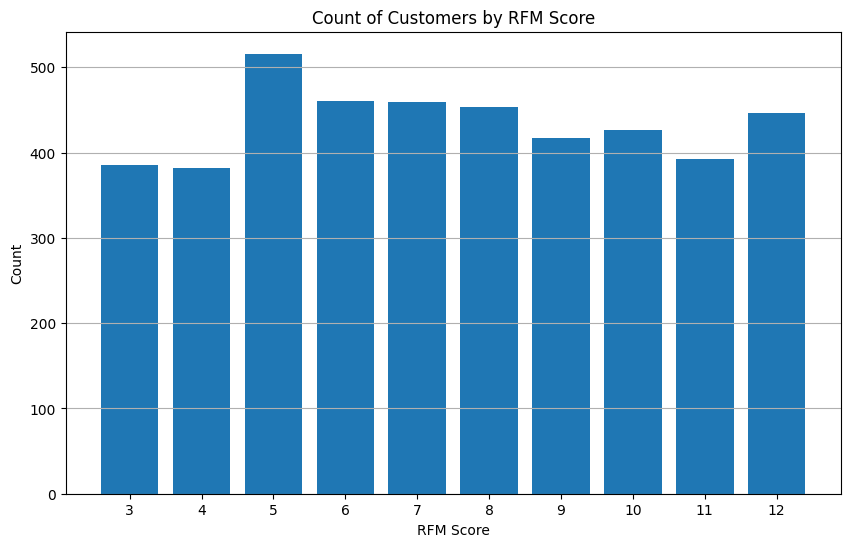

In [56]:
# Plot the number of customers per RFM score
plt.figure(figsize=(10, 6))
plt.bar(count_by_RFM['RFM_Score'], count_by_RFM['count'])
plt.xlabel('RFM Score')
plt.xticks(count_by_RFM['RFM_Score'])
plt.ylabel('Count')
plt.title('Count of Customers by RFM Score')
plt.grid(axis='y')
plt.show()

### Customer Segmentation Using RFM Score

We classify customers into meaningful segments based on their RFM Score. This helps tailor marketing strategies according to customer behavior and value.

| Segment              | RFM Score Range |
|----------------------|-----------------|
| Champion             | 9 - 12          |
| Loyal                | 7 - 8           |
| Potential Loyalist   | 5 - 6           |
| Needs Attention      | 3 - 4           |
| At Risk              | 0 - 2           |


In [57]:
# Function to assign customer segments based on RFM Score
def segment_customer(rfm):
    if rfm['RFM_Score'] >= 9:
        return 'Champion'
    elif rfm['RFM_Score'] >= 7:
        return 'Loyal'
    elif rfm['RFM_Score'] >= 5:
        return 'Potential Loyalist'
    elif rfm['RFM_Score'] >= 3:
        return 'Needs Attention'
    else:
        return 'At Risk'

# Apply segmentation function
rfm['Segment'] = rfm.apply(segment_customer, axis=1)

# Preview segmented RFM data
rfm.head()

,CustomerID,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_Score,Segment
0,12346.0,326,1,77183.60,1,1,4,6,Potential Loyalist
1,12347.0,2,182,4310.00,4,4,4,12,Champion
2,12348.0,75,31,1797.24,2,2,4,8,Loyal
3,12349.0,19,73,1757.55,3,3,4,10,Champion
4,12350.0,310,17,334.40,1,1,2,4,Needs Attention


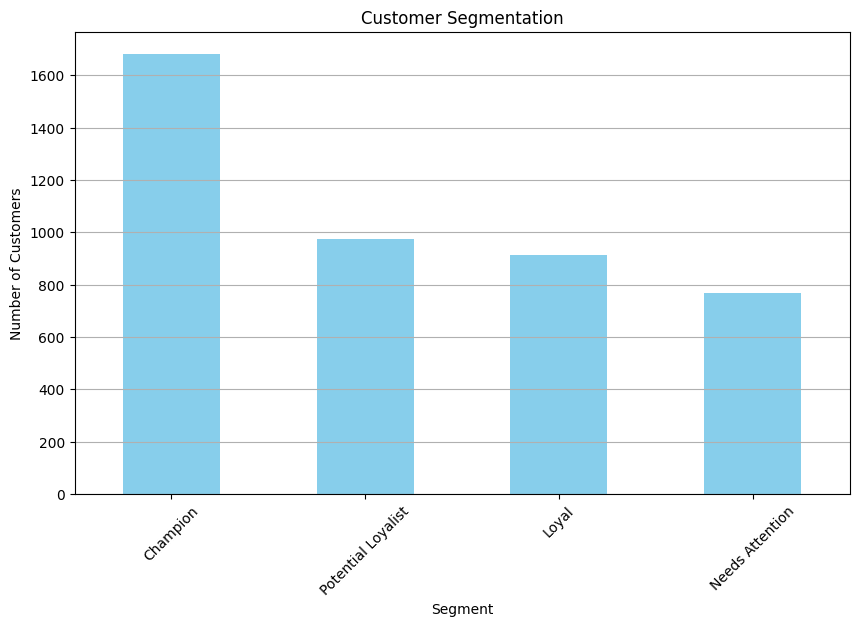

In [58]:
plt.figure(figsize=(10, 6))
rfm['Segment'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Customer Segmentation')
plt.xlabel('Segment')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

## 7. Churn Analysis

To identify churned customers, we calculate the number of days since each customer's most recent purchase. Customers who haven't purchased in the last **90 days** are considered churned for this analysis.

In [59]:
df3['InvoiceDate'].max()

Timestamp('2011-12-09 12:50:00')

In [60]:
# Get the most recent purchase date for each customer
last_purchase_date = df3.groupby('CustomerID')['InvoiceDate'].max().reset_index()
last_purchase_date.columns = ['CustomerID','LastPurchaseDate']
last_purchase_date.head()

,CustomerID,LastPurchaseDate
0,12346.0,2011-01-18 10:01:00
1,12347.0,2011-12-07 15:52:00
2,12348.0,2011-09-25 13:13:00
3,12349.0,2011-11-21 09:51:00
4,12350.0,2011-02-02 16:01:00


In [61]:
threshold = 90

# Calculate days since last purchase for each customer
last_purchase_date['Churn'] = (current_date - last_purchase_date['LastPurchaseDate']).dt.days

# Filter customers who have churned (i.e., last purchase was more than 90 days ago)
churned_df = last_purchase_date[last_purchase_date['Churn'] > threshold].sort_values(by='Churn', ascending=False)
churned_df.head()

print("Number of Churned Customers:", churned_df.shape[0])

Number of Churned Customers: 1449


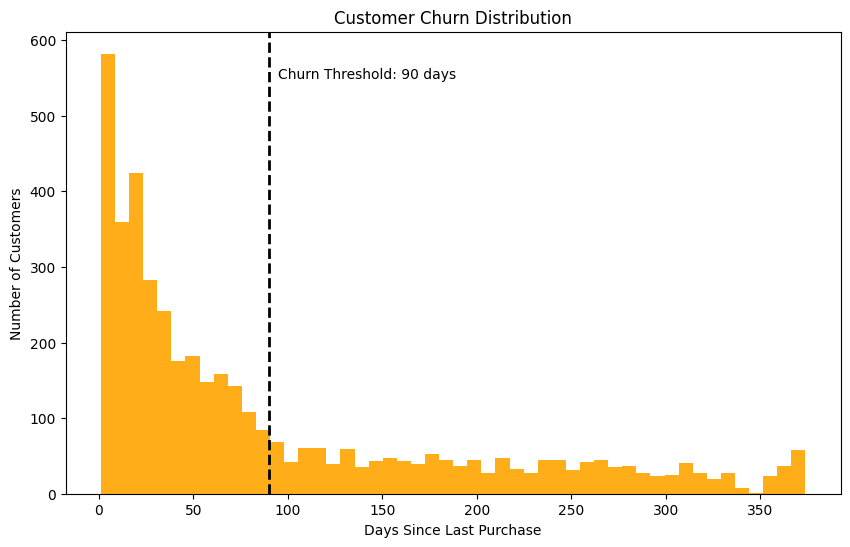

In [62]:

# Plot a histogram of days since last purchase
plt.figure(figsize=(10, 6))
plt.hist(last_purchase_date['Churn'], bins=50, color='orange', alpha=0.9)

# Add a vertical line for the churn threshold
plt.axvline(threshold, color='black', linestyle='dashed', linewidth=2)
plt.title('Customer Churn Distribution')
plt.text(threshold + 5, plt.ylim()[1] * 0.9, f'Churn Threshold: {threshold} days', color='black')
plt.xlabel('Days Since Last Purchase')
plt.ylabel('Number of Customers')
plt.show()
